In [9]:
import FlareFlaggingClass
import pandas as pd
import importlib
importlib.reload(FlareFlaggingClass)

<module 'FlareFlaggingClass' from '/home/idavis/Iveys_ToolBox/FlareFlaggingClass.py'>

## Loading in the list of TIC numbers and associated temperatures and radii:

In [2]:
tic_list = pd.read_csv('tic_list.csv')
tics = list(tic_list['TIC'])
temps = list(tic_list['Teff'])
radii = list(tic_list['Rad'])

## Instantiating the Star object using the TIC number, radius, and temperature:

In [3]:
i = 87
star = FlareFlaggingClass.Star(tics[i], radius = radii[i], temperature = temps[i],sectors = range(1,13))
print(f"Period: {star.period} days")
star.lcs.stitch().scatter()

ConnectionError: HTTPSConnectionPool(host='mast.stsci.edu', port=443): Max retries exceeded with url: /portal/Mashup/Mashup.asmx/columnsconfig (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb19a5c83d0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

## Instantiating the Flares object that holds information/functions necessary for finding flares:

6 flares found


/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3486: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


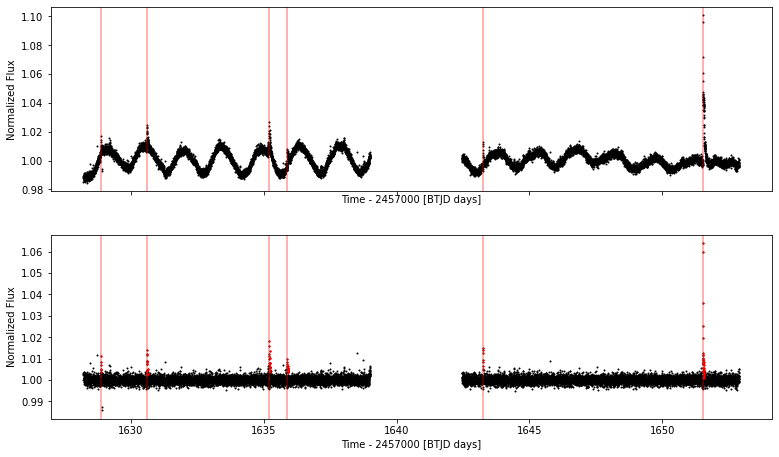

In [4]:
fl = FlareFlaggingClass.Flares(star)
fl.SplitLightCurve()
fl.FlagLightCurves()
fl.FindAllFlares()
print(f"{len(fl.flare_table)} flares found")
fig, axs = fl.PlotLightCurves()
fig.set_figheight(7)
fig.set_figwidth(12)

## Checking the flagged light curve:


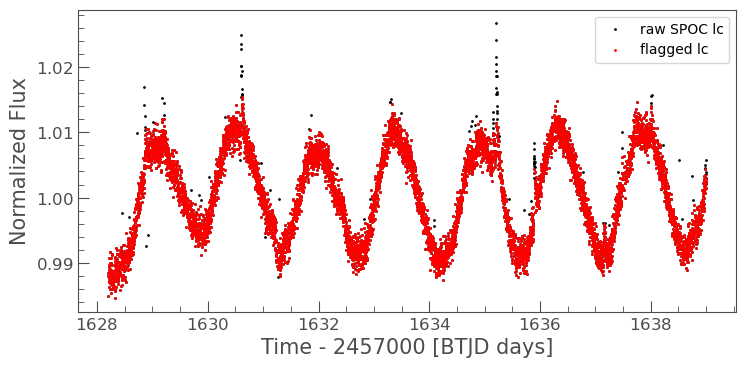

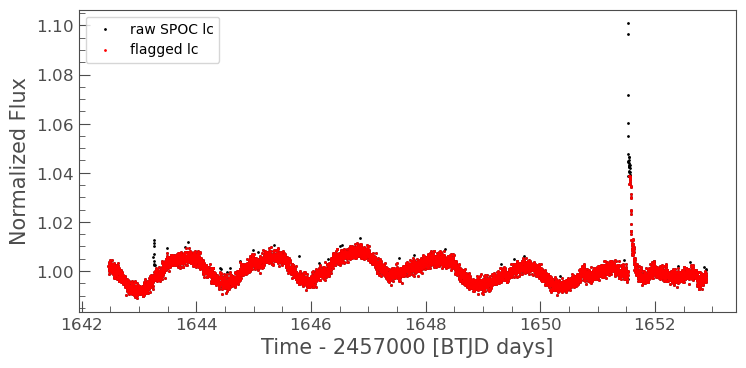

In [5]:
for i in range(len(fl.lc_arr)):
    ax = fl.lc_arr[i].scatter(c = 'k')
    fl.lc_flagged[i].scatter(ax = ax, c = 'r')
    ax.legend(['raw SPOC lc','flagged lc'])
    

You might notice from the preceding light curves, that in the second curve, the large flare at the end is being partially incorporated in the flagged light curve when it shouldn't be. When calculating the energy of this flare, it will then be underestimated. This can happen when the window size for making the median filter is too small. We can fix this by making the window size bigger:

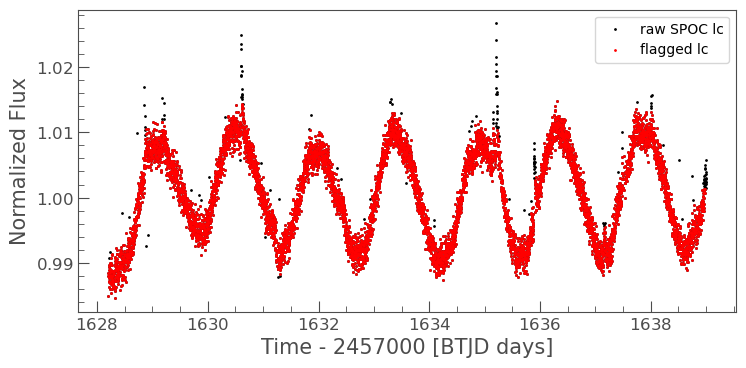

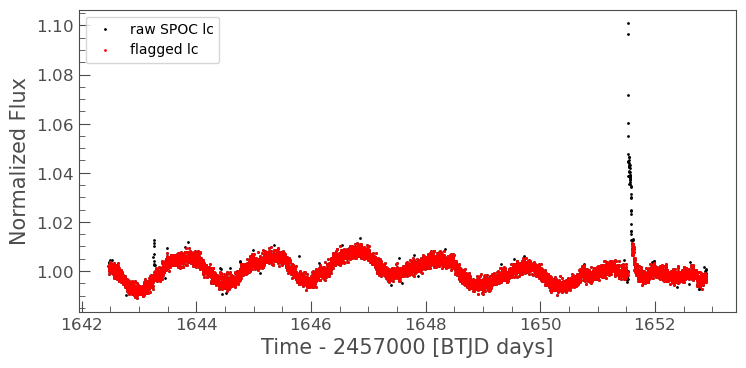

In [6]:
fl.window = 2 * fl.window +1
fl.FlagLightCurves()
for i in range(len(fl.lc_arr)):
    ax = fl.lc_arr[i].scatter(c = 'k')
    fl.lc_flagged[i].scatter(ax = ax, c = 'r')
    ax.legend(['raw SPOC lc','flagged lc'])

Much less of the large flare is now being incorporated in the flagged light curve!

/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3486: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Text(0.5, 0.98, 'Flare rate: 125.57025920873124 1 / yr')

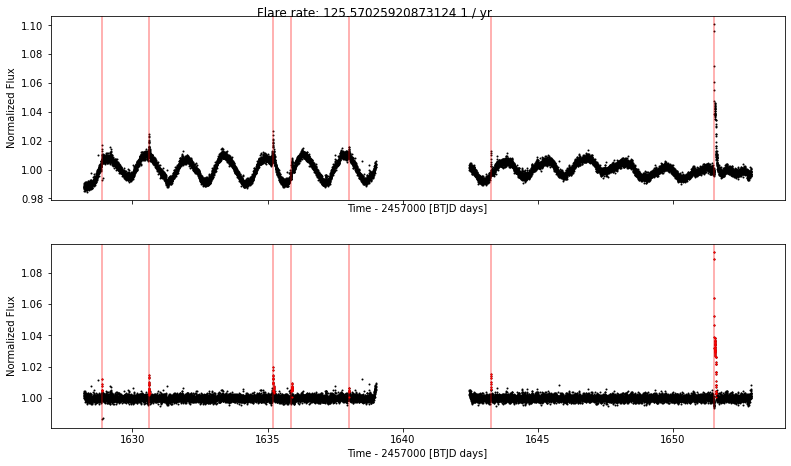

In [7]:
fl.FindAllFlares()
fig, axs = fl.PlotLightCurves()

fig.set_figheight(7)
fig.set_figwidth(12)
fig.suptitle(f"Flare rate: {fl.flare_rate}")

You can compare the scale of the y-axis of the normalized plot here to the scale of the y-axis of the previous normalized plot-- the highest flux reached is much higher now because we corrected the flagged light curve. We even found an extra flare now!

/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3736: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3736: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3736: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/home/idavis/anaconda3/lib/python3.9/site-packages/astropy/table/table.py:3736: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform el

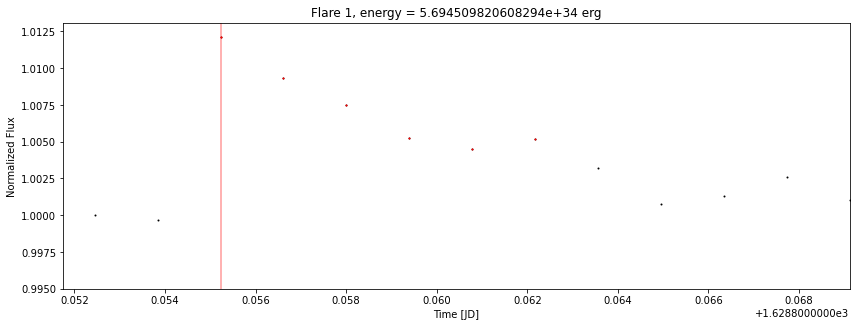

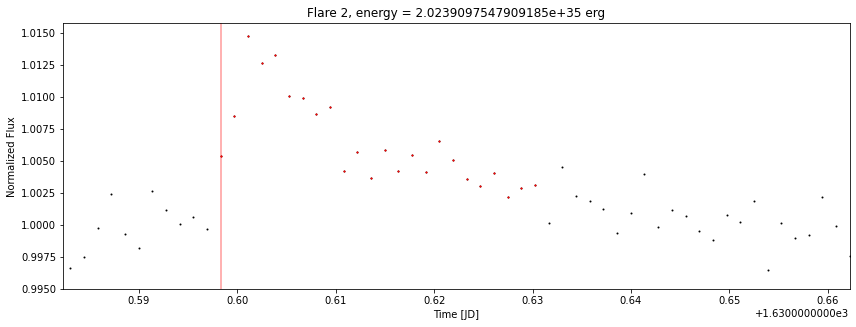

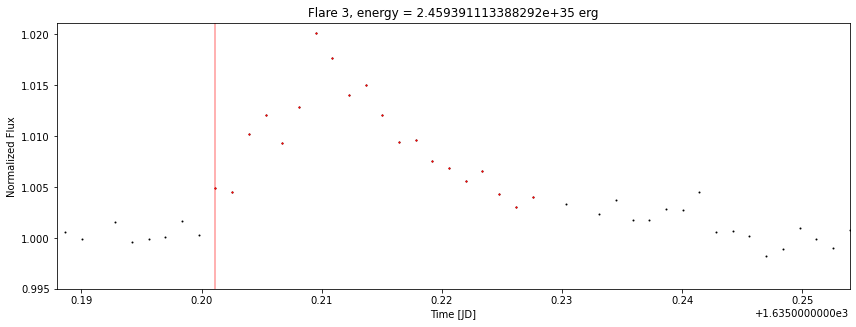

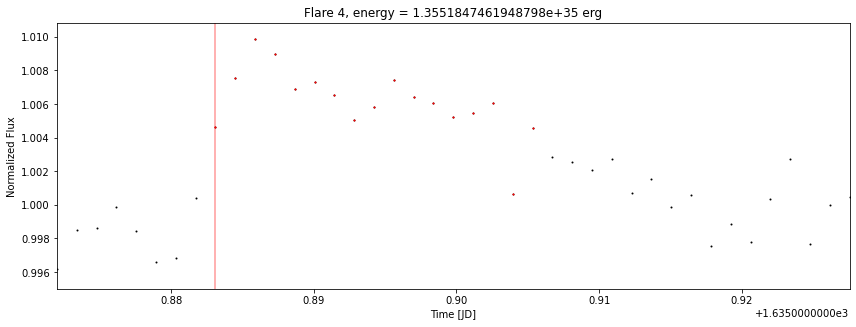

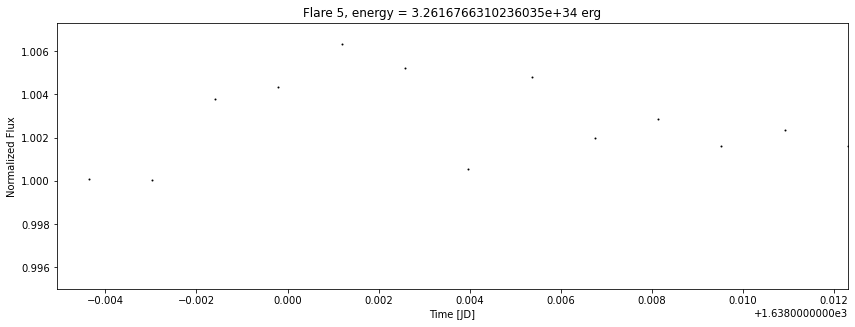

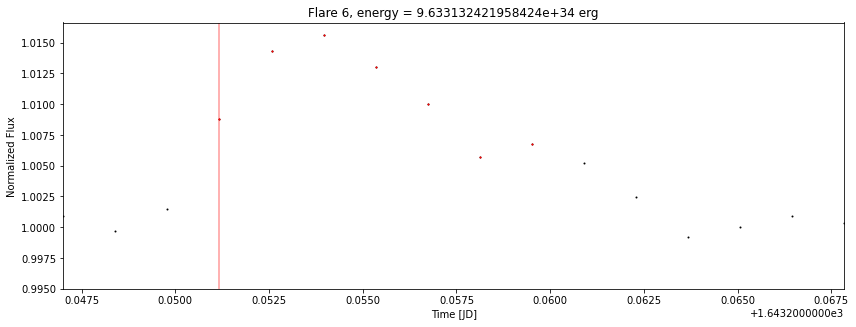

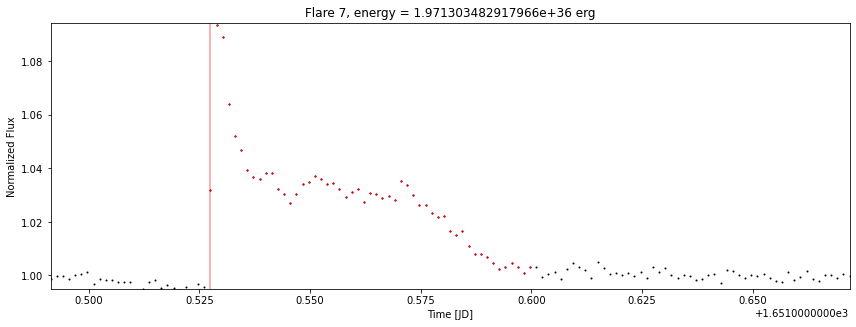

In [15]:
for i in range(len(fl.flare_table)):
    start = fl.flare_table[i]['flare_start']
    duration = fl.flare_table[i]['duration'] /(24 * 3600) # convert from seocnds to days
    end = start + duration
    fig, ax = fl.PlotLightCurves()
    fig.delaxes(ax[0])
    ax[1].set_xlim((start-duration/2,end + duration))
    ax[1].set_ylim((0.995,max(fl.flares[i].flux.data)*1.001))
    fig.set_figheight(8.5)
    fig.set_figwidth(12)
    ax[1].set_title(f"Flare {i + 1}, energy = {fl.flare_table[i]['energy']} erg")
    fig.tight_layout()

Maybe we don't think Flare 5 is actually a flare. We can remove it from our sample and recalculate the flare rate:

In [16]:
fl.FlagFlares([4])
fl.CalculateFlareRate()

print(f"New flare rate: {fl.flare_rate}")

New flare rate: 107.63165075034108 1 / yr


## Saving information about the system:

If you don't specify the base_dir variable, it'll save to the directory that you are working in. The directory naming convention is `TIC{tic_num}/`

In [9]:
fl.WriteOutData()

mkdir: cannot create directory ‘TIC79358659/’: File exists
/home/idavis/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


## Load it back in:

In [10]:
import glob
dirs = glob.glob('TIC*/')
fl = FlareFlaggingClass.LoadInStar(dirs[0])
fl.star.tic_num

/home/idavis/Iveys_ToolBox/FlareFlaggingClass.py:834: UserWarning: Couldn't mask time column
  warn(f"Couldn't mask {c} column")
/home/idavis/Iveys_ToolBox/FlareFlaggingClass.py:115: UserWarning: Could not remove directory /home/idavis/.lightkurve-cache/mastDownload/TESS/tess2019140104343-s0012-0000000079358659-0144-s/tess2019140104343-s0012-0000000079358659-0144-s_lc.fits
  warn(f"Could not remove directory {fn}")


79358659